In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from plotnine import *
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
import seaborn as sns

Load the data that was preprocessed in EDA phase:

In [3]:
TRAIN_PTS = 1458
SPLIT = int((TRAIN_PTS/100.)*70)

In [4]:
qual_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition','MoSold', 'YrSold']
quant_cols = ['TotalArea','SalePrice','LotFrontage', 'MasVnrArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [5]:
full_df = pd.read_csv("full_df.csv")
full_df = full_df.set_index("Id")
full_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalArea,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856.0,854.0,0.0,None,3.0,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8.0,2566.0,856.0,0.0,2003.0,2003.0,2008.0
2,1262.0,0.0,0.0,None,3.0,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6.0,2524.0,1262.0,298.0,1976.0,1976.0,2007.0
3,920.0,866.0,0.0,None,3.0,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6.0,2706.0,920.0,0.0,2001.0,2002.0,2008.0
4,961.0,756.0,0.0,None,3.0,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7.0,2473.0,756.0,0.0,1915.0,1970.0,2006.0
5,1145.0,1053.0,0.0,None,4.0,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9.0,3343.0,1145.0,192.0,2000.0,2000.0,2008.0
6,796.0,566.0,320.0,None,1.0,1Fam,TA,No,732.0,0.0,...,WD,0.0,Pave,5.0,2158.0,796.0,40.0,1993.0,1995.0,2009.0
7,1694.0,0.0,0.0,None,3.0,1Fam,TA,Av,1369.0,0.0,...,WD,0.0,Pave,7.0,3380.0,1686.0,255.0,2004.0,2005.0,2007.0
8,1107.0,983.0,0.0,None,3.0,1Fam,TA,Mn,859.0,32.0,...,WD,0.0,Pave,7.0,3197.0,1107.0,235.0,1973.0,1973.0,2009.0
9,1022.0,752.0,0.0,None,2.0,1Fam,TA,No,0.0,0.0,...,WD,0.0,Pave,8.0,2726.0,952.0,90.0,1931.0,1950.0,2008.0


In [6]:
full_df[qual_cols]=full_df[qual_cols].applymap(str)
full_df[quant_cols] = full_df[quant_cols].astype("float64")
quant_cols.remove("SalePrice")

del full_df["TotalBsmtSF"]
del full_df["1stFlrSF"]
del full_df["2ndFlrSF"]

for el in ["TotalBsmtSF","1stFlrSF","2ndFlrSF"]:
    quant_cols.remove(el)


#1458 bc 2 outliers removed in EDA
train_df = full_df[:1458]
test_df  = full_df[1458:].drop("SalePrice", axis = 1)

In [7]:
train_df["SalePrice"] = train_df["SalePrice"].apply(np.log10)

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
train_df = train_df.reindex(np.random.permutation(train_df.index))
valid_df = train_df[SPLIT:]
train_df = train_df[:SPLIT]

In [9]:
y_train = train_df["SalePrice"]
del train_df["SalePrice"]

y_valid = valid_df["SalePrice"]
del valid_df["SalePrice"]
y_valid

del full_df["SalePrice"]

Create columns:

In [10]:
def make_columns(df):
    keep_num = ["TotalArea", "YearBuilt"]
    keep_cat = ["OverallQual", "HouseStyle", "YrSold", "MoSold", "Neighborhood"]
    
    numeric_features = df.select_dtypes(include = ["float64"])
    
    
    numeric_columns = [tf.feature_column.numeric_column(key = feature) for feature in numeric_features]
    categoric_features = df.select_dtypes(exclude=["float64"]) 
    
    categoric_dict = {}
    for feature in categoric_features:
        categoric_dict[feature] = df[feature].unique()
    
    categoric_columns = [tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=list(categoric_dict[feature]))) for feature in categoric_features]
    return numeric_columns, categoric_columns

In [11]:
numeric_columns, categoric_columns = make_columns(full_df)

In [12]:
OUT_DIR = "tf_files_housing"

Define error function:

In [13]:
def rmse(labels, predictions):
    
    return {"rmse":tf.metrics.root_mean_squared_error(
    tf.cast(labels, tf.float32), tf.cast(predictions["predictions"], tf.float32))}

In [14]:
#tf.logging.set_verbosity(tf.logging.ERROR)

In [15]:
!rm -rf tf_files_housing/

Define model function:

In [16]:
def train_DNN_estimator(learning_rate, steps, batch_size):
    
    my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    
    DNN_estimator = tf.estimator.DNNRegressor(
    feature_columns = numeric_columns+categoric_columns,
    hidden_units = [10,10,10],
    optimizer = my_optimizer,
    config=tf.estimator.RunConfig(keep_checkpoint_max=1).replace(save_summary_steps=2),
    dropout=0.25,
    model_dir=OUT_DIR)
    
    DNN_estimator = tf.contrib.estimator.add_metrics(DNN_estimator, rmse)
    
    periods = 10
    steps_per_period = int(steps/periods)
    
    train_input_fn = tf.estimator.inputs.pandas_input_fn(x=train_df,y=y_train,batch_size=batch_size,shuffle=True)
    predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(x=train_df,y=y_train,batch_size=batch_size,shuffle=False)
    predict_valid_input_fn = tf.estimator.inputs.pandas_input_fn(x=valid_df,y=y_valid,batch_size=batch_size,shuffle=False)
    
    training_errors = []
    validation_errors = []
    training_losses = []
    validation_losses = []
    
    f = plt.Figure()
    graph1 = f.add_subplot(211)
    graph2 = f.add_subplot(212,sharex=graph1)
    
    for period in range(0, periods):
        DNN_estimator.train(input_fn=train_input_fn,steps=steps_per_period)       
        
        
        train_error = DNN_estimator.evaluate(input_fn=predict_train_input_fn)["rmse"]
        train_loss  = DNN_estimator.evaluate(input_fn=predict_train_input_fn)["loss"]
        valid_error = DNN_estimator.evaluate(input_fn=predict_valid_input_fn)["rmse"]
        valid_loss  = DNN_estimator.evaluate(input_fn=predict_valid_input_fn)["loss"]
        
        #print("Train error: {}".format(train_error))
        #print("Valid error: {}".format(valid_error))
        training_errors.append(train_error)
        validation_errors.append(valid_error)
        training_losses.append(train_loss)
        validation_losses.append(valid_loss)
        
        
        ax = plt.subplot("211")
        ax.clear()
        ax.set_title("RMSE over time")
        ax.plot(training_errors, label="training error")
        ax.plot(validation_errors, label="validation error")

        ax = plt.subplot("212")
        ax.clear()
        ax.set_title("Loss over time")
        ax.plot(training_losses, label="training loss")
        ax.plot(validation_losses, label="validation loss")
    
    return DNN_estimator

Train model:

INFO:tensorflow:Using config: {'_model_dir': 'tf_files_housing', '_tf_random_seed': None, '_save_summary_steps': 2, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f41fe8d0630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': 'tf_files_housing', '_tf_random_seed': None, '_save_summary_steps': 2, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-03:55:26
INFO:tensorflow:Saving dict for global step 32: average_loss = 2371.937, global_step = 32, label/mean = 5.221352, loss = 151210.98, prediction/mean = 13.69262, rmse = 48.702538
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 32: tf_files_housing/model.ckpt-32
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-03:55:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_housing/model.ckpt-32
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-03:55:29
INFO:tensorflow:Saving dict for global step 32: average_loss = 388.9078, global_step = 32, label/mean = 5.2233768, loss = 24

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-03:56:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_housing/model.ckpt-64
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-03:56:09
INFO:tensorflow:Saving dict for global step 64: average_loss = 69.78452, global_step = 64, label/mean = 5.2233768, loss = 4366.517, prediction/mean = 1.4593598, rmse = 8.353713
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 64: tf_files_housing/model.ckpt-64
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters fr

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 96 into tf_files_housing/model.ckpt.
INFO:tensorflow:loss = 1709.7687, step = 96
INFO:tensorflow:Saving checkpoints for 112 into tf_files_housing/model.ckpt.
INFO:tensorflow:Loss for final step: 1558.3872.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-03:56:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_housing/model.ckpt-112
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-03:56:55
INFO:tensorflow:Saving dict for global step 112: average_loss = 199.80449, global_step = 112, label/mean = 5.221352, loss = 12737.536, prediction/mean = 1.009638, rmse = 14.1352215
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 112: tf

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-03:57:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_housing/model.ckpt-144
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-03:57:35
INFO:tensorflow:Saving dict for global step 144: average_loss = 60.973495, global_step = 144, label/mean = 5.221352, loss = 3887.0603, prediction/mean = 0.7034512, rmse = 7.8085527
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 144: tf_files_housing/model.ckpt-144
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-03:57:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

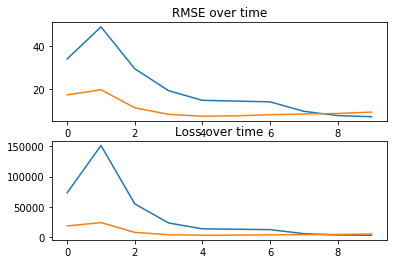

In [17]:
model = train_DNN_estimator(learning_rate=0.001, steps = 2000, batch_size=64)

Generate submission:

In [18]:
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(x=test_df,batch_size=64,shuffle=False)
predictions = model.predict(input_fn = predict_test_input_fn)
pred = [prediction['predictions'].item(0) for prediction in predictions]
pred = np.power(10, pred)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_housing/model.ckpt-160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [19]:
submission = pd.DataFrame()
submission["Id"] = test_df.index
submission = submission.set_index("Id")
submission["SalePrice"] = pred
submission.to_csv("mtolstok_housing_pred_DNN_est.csv")